In [ ]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# importing csv file
df=pd.read_csv('Retail_Transaction_Dataset.csv')
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [ ]:
#check for null values
df.isnull().sum()

,0
CustomerID,0
ProductID,0
Quantity,0
Price,0
TransactionDate,0
PaymentMethod,0
StoreLocation,0
ProductCategory,0
DiscountApplied(%),0
TotalAmount,0


In [ ]:
#fill null values
df.fillna({'DiscountApplied(%)':0}, inplace=True)
df.fillna({'ProductCategory':'Books'}, inplace=True)
df.fillna({'TotalAmount':0},inplace=True)
df.isnull().sum()

,0
CustomerID,0
ProductID,0
Quantity,0
Price,0
TransactionDate,0
PaymentMethod,0
StoreLocation,0
ProductCategory,0
DiscountApplied(%),0
TotalAmount,0


In [ ]:
#check for duplicacy
df.duplicated().sum()

np.int64(0)

In [ ]:
#group by payment method
method_df=df.groupby('PaymentMethod')['ProductID'].count()
print (method_df)

PaymentMethod
Cash           25008
Credit Card    25034
Debit Card     24891
PayPal         25067
Name: ProductID, dtype: int64


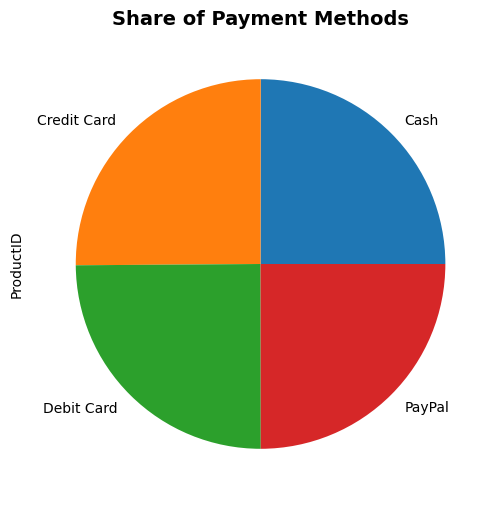

In [ ]:
#piechart for payment method
method_df.plot(kind='pie', figsize=(6,6))
plt.title("Share of Payment Methods", fontsize=14, fontweight='bold')
plt.show()

In [ ]:
#quantities of different products traded
product_df=df.groupby('ProductCategory')['Quantity'].sum()
product_df['percent']=round(product_df/product_df.sum(),2)*100
print(product_df.percent)

ProductCategory
Books          25.0
Clothing       25.0
Electronics    25.0
Home Decor     25.0
Name: Quantity, dtype: float64


In [ ]:
#find the median and highest price
median_price= df['Price'].median()
print("Median Price ",median_price)
highest_price=df['Price'].max()
print("Highest Price ",highest_price)

Median Price  55.077678885
Highest Price  99.99928381


In [ ]:
#maximum discount
discount_df=df.groupby('ProductCategory')['DiscountApplied(%)'].max()
print(discount_df)

ProductCategory
Books          19.999585
Clothing       19.998331
Electronics    19.999501
Home Decor     19.999555
Name: DiscountApplied(%), dtype: float64


In [ ]:
#Discount greater than 10%
dis_df=df[df['DiscountApplied(%)']>10]
print(dis_df)

       CustomerID ProductID  Quantity      Price   TransactionDate  \
0          109318         C         7  80.079844  12/26/2023 12:32   
1          993229         C         4  75.195229     8/5/2023 0:00   
2          579675         A         8  31.528816   3/11/2024 18:51   
5          463050         D         3  54.093152    8/15/2023 4:24   
6          888163         D         7  13.121937   12/26/2023 5:32   
...           ...       ...       ...        ...               ...   
99993      248780         B         4  92.839338     6/3/2023 3:53   
99994      877546         A         5  53.600296    6/29/2023 3:36   
99995      726461         A         2  56.078258   7/17/2023 16:59   
99997      887304         B         4  72.385564    8/25/2023 7:59   
99998      326401         C         5  66.542239    2/5/2024 19:45   

      PaymentMethod                                      StoreLocation  \
0              Cash            176 Andrew Cliffs\nBaileyfort, HI 93354   
1          

In [ ]:
# percentange of products discounted above 10%
above= dis_df['Quantity'].count()
below=(df['Quantity'].count())-above
print(round(above/df['Quantity'].count(),2)*100,'% of products have discount above 10%')

50.0 % of products have discount above 10%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


In [ ]:
#covert data type from object to datetime
df['TransactionDate']=pd.to_datetime(df['TransactionDate'], dayfirst=True, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  int64         
 1   ProductID           100000 non-null  object        
 2   Quantity            100000 non-null  int64         
 3   Price               100000 non-null  float64       
 4   TransactionDate     100000 non-null  datetime64[ns]
 5   PaymentMethod       100000 non-null  object        
 6   StoreLocation       100000 non-null  object        
 7   ProductCategory     100000 non-null  object        
 8   DiscountApplied(%)  100000 non-null  float64       
 9   TotalAmount         100000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 7.6+ MB


/tmp/ipython-input-60-2017704304.py:2: UserWarning: Parsing dates in %m/%d/%Y %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['TransactionDate']=pd.to_datetime(df['TransactionDate'], dayfirst=True, errors='coerce')


In [ ]:
#transactions before 12/31/2023
cutoff_date=pd.Timestamp('12/31/2023')
date_df=df[df['TransactionDate']<cutoff_date]
print(date_df)

       CustomerID ProductID  Quantity      Price     TransactionDate  \
0          109318         C         7  80.079844 2023-12-26 12:32:00   
1          993229         C         4  75.195229 2023-08-05 00:00:00   
3          799826         D         5  98.880218 2023-10-27 22:00:00   
4          121413         A         7  93.188512 2023-12-22 11:38:00   
5          463050         D         3  54.093152 2023-08-15 04:24:00   
...           ...       ...       ...        ...                 ...   
99993      248780         B         4  92.839338 2023-06-03 03:53:00   
99994      877546         A         5  53.600296 2023-06-29 03:36:00   
99995      726461         A         2  56.078258 2023-07-17 16:59:00   
99996      328056         A         6  88.516406 2023-05-30 09:04:00   
99997      887304         B         4  72.385564 2023-08-25 07:59:00   

      PaymentMethod                                      StoreLocation  \
0              Cash            176 Andrew Cliffs\nBaileyfort,